<a href="https://colab.research.google.com/github/Mohammed-Aasim-9988/Assignments_DS/blob/main/final_simple_linear_regression_2_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data (1).csv to Salary_Data (1) (1).csv


In [ ]:
dataset = pd.read_csv("Salary_Data (1).csv")

In [ ]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#EDA and Data Visualization

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-55-c16c18e1f77c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

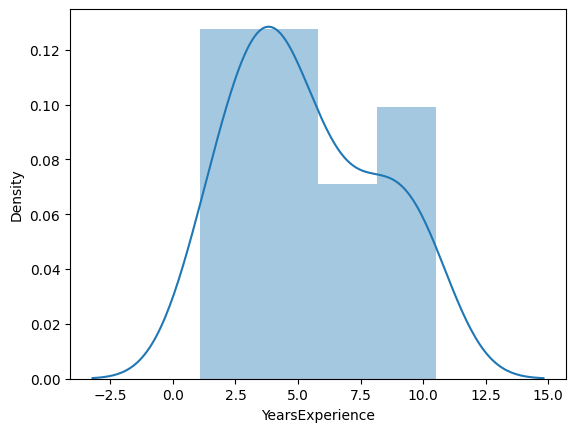

In [ ]:
sns.distplot(dataset['YearsExperience'])

<ipython-input-56-9fd6134c9331>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

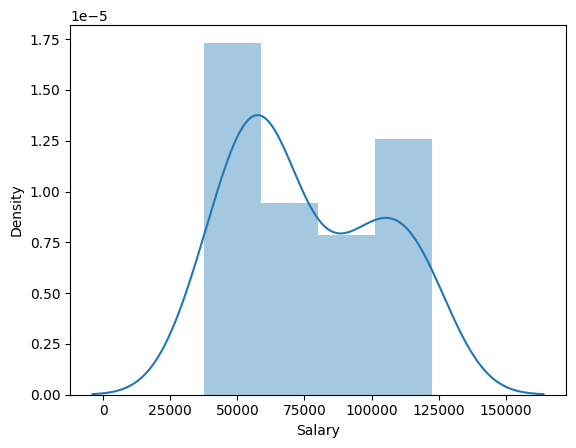

In [ ]:
sns.distplot(dataset['Salary'])

In [ ]:
 #Standardization(Z-score normalization)
data_standardized = (dataset - dataset.mean()) / dataset.std()
data_standardized

,YearsExperience,Salary
0,-1.484672,-1.337252
1,-1.414197,-1.086946
2,-1.343722,-1.396053
3,-1.167535,-1.184705
4,-1.097060,-1.317262
5,-0.850398,-0.706234
6,-0.815160,-0.578272
7,-0.744685,-0.786374
8,-0.744685,-0.421603
9,-0.568498,-0.686281


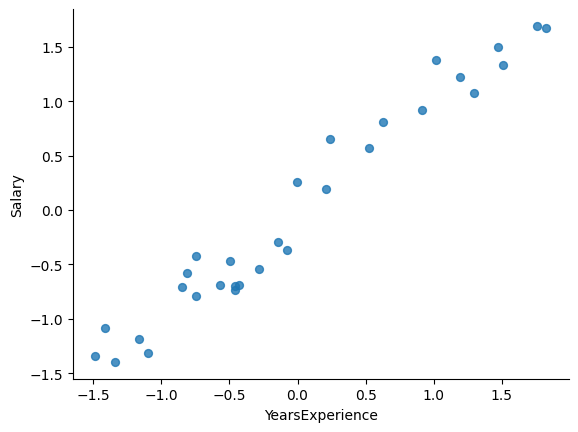

In [ ]:
from matplotlib import pyplot as plt
data_standardized.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Min-Max Scaling
data_min_max_scaled = (dataset - dataset.min()) / (dataset.max() - dataset.min())
data_min_max_scaled

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


<Axes: xlabel='YearsExperience', ylabel='Salary'>

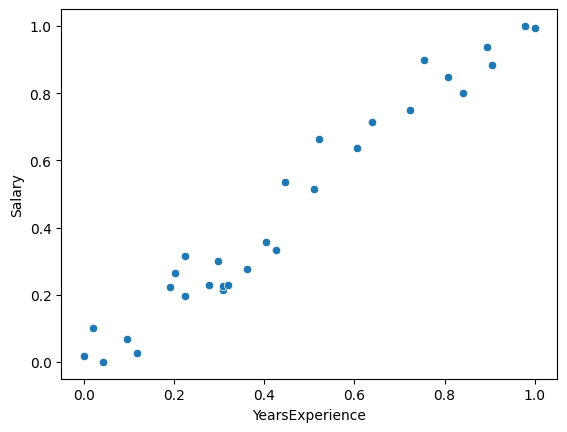

In [ ]:

sns.scatterplot(x="YearsExperience", y="Salary", data=data_min_max_scaled)

#Correlation Analysis

In [ ]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
data_standardized.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
data_min_max_scaled.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

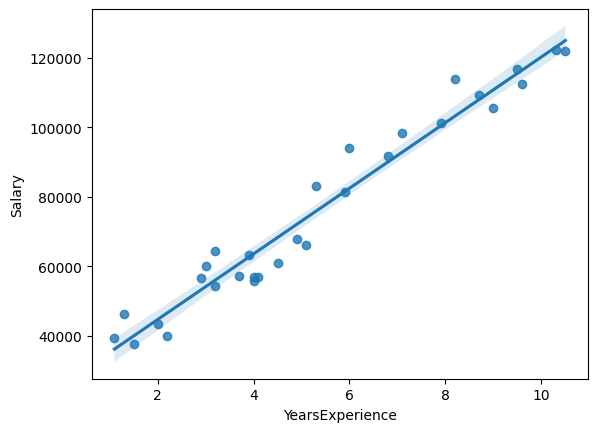

In [ ]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

#Model Building

In [ ]:
model=smf.ols("Salary~YearsExperience",data=data_min_max_scaled).fit()


In [ ]:
model1=smf.ols("Salary~YearsExperience",data=data_standardized).fit()

#Model Testing

In [ ]:
# Finding Cefficient Parameters
model.params

Intercept         -0.018236
YearsExperience    1.049252
dtype: float64

In [ ]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          -0.806598
 YearsExperience    24.950094
 dtype: float64,
 Intercept          4.266967e-01
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
model1.tvalues, model1.pvalues

(Intercept         -1.440018e-15
 YearsExperience    2.495009e+01
 dtype: float64,
 Intercept          1.000000e+00
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
model1.rsquared, model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

#Model Predictions

In [ ]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [ ]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [ ]:
model.predict(data_pred)

0    3.129519
1    5.228023
dtype: float64

In [ ]:
model.predict(dataset)

0      1.135941
1      1.345791
2      1.555642
3      2.080268
4      2.290118
5      3.024594
6      3.129519
7      3.339370
8      3.339370
9      3.863995
10     4.073846
11     4.178771
12     4.178771
13     4.283696
14     4.703397
15     5.123097
16     5.332948
17     5.542798
18     6.172349
19     6.277274
20     7.116676
21     7.431451
22     8.270852
23     8.585628
24     9.110254
25     9.425029
26     9.949655
27    10.054580
28    10.789056
29    10.998907
dtype: float64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
dataset = pd.read_csv("Salary_Data (1).csv")

# Separate features and target
X = dataset["YearsExperience"].values.reshape(-1, 1)
y = dataset["Salary"]

# Apply different transformations
scaler_list = [StandardScaler(), MinMaxScaler(), RobustScaler(), QuantileTransformer()]
model_list = []

for scaler in scaler_list:
  # Transform the features
  X_transformed = scaler.fit_transform(X)

  # Train the model
  model = LinearRegression().fit(X_transformed, y)
  model_list.append(model)

  # Evaluate the model
  y_pred = model.predict(X_transformed)
  mse = mean_squared_error(y, y_pred)
  r2 = r2_score(y, y_pred)

  # Print the results
  print(f"Transformation: {scaler.__class__.__name__}")
  print(f"MSE: {mse:.2f}")
  print(f"R2: {r2:.2f}")
  print()



Transformation: StandardScaler
MSE: 31270951.72
R2: 0.96

Transformation: MinMaxScaler
MSE: 31270951.72
R2: 0.96

Transformation: RobustScaler
MSE: 31270951.72
R2: 0.96

Transformation: QuantileTransformer
MSE: 56619796.78
R2: 0.92



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  warnings.warn(


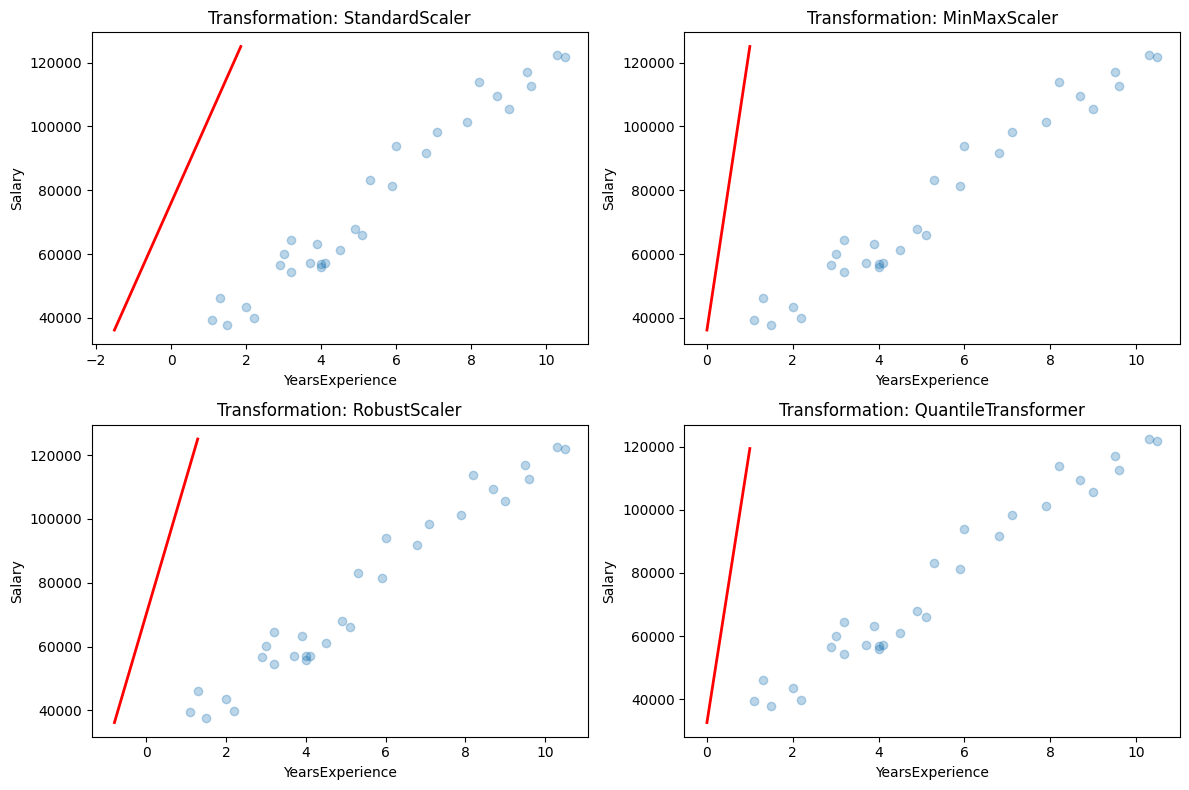

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the data for each transformation
for i, (scaler, model) in enumerate(zip(scaler_list, model_list)):
  ax = axes[i // 2, i % 2]
  ax.scatter(X, y, alpha=0.3)

  # Transform the features and predict
  X_transformed = scaler.transform(X)
  y_pred = model.predict(X_transformed)

  # Plot the regression line
  ax.plot(X_transformed, y_pred, color="red", linewidth=2)

  # Set title and labels
  ax.set_title(f"Transformation: {scaler.__class__.__name__}")
  ax.set_xlabel("YearsExperience")
  ax.set_ylabel("Salary")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
